In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
maindir = '/content/drive/MyDrive/FinTech-final-project'
import pandas as pd
filepath = f'{maindir}/東吳課程_發票資料集/品類資料集/cat_train_v2.csv'
catdf = pd.read_csv(filepath)

In [4]:
catdf.head()

,name,occurred_at,iv_price,units,unit_price,total_price,channel,product
0,R視舒坦單支裝人工淚液點眼液0.5ml 24支入,2021/1/10,984,1.0,389.0,369.0,2c2cc93adb503077c729a911c56c33b9,人工淚液
1,優麗舒點眼液15ML,2021/1/6,3264,1.0,275.0,275.0,6e4a29dff31f61e4697e99cc7ca6fb32,人工淚液
2,(R)視舒坦單支裝人工,2021/1/2,1357,1.0,369.0,369.0,e986ac35e1cc20804d869c557be26cf9,人工淚液
3,Rohto乾眼淚液,2021/1/2,1029,1.0,251.0,251.0,744d57a1f2862ef004885122c81a890b,人工淚液
4,R參天柔潤人工淚液點眼液 5ml 4入,2021/1/9,1538,1.0,278.0,278.0,2c2cc93adb503077c729a911c56c33b9,人工淚液


In [7]:
catdf['product'].value_counts() # Length: 272

洗髮精              3677
沐浴乳              3037
洗面乳              2844
速食麵/泡麵           2360
洗衣精              2094
                 ... 
卸妝棉;卸妝乳;卸妝油         1
卸妝水;卸妝乳             1
蜜粉;遮瑕膏              1
修容;粉餅               1
眼線液筆;眼線膠筆;眼線筆       1
Name: product, Length: 272, dtype: int64

## percentile graph (distribution)

In [28]:
# categories = set(x for k in pD.keys() for x in k.split(';'))
from collections import defaultdict
catD = defaultdict(int)
for k in catdf['product']:
  for x in k.split(';'):
    catD[x] += 1 

In [32]:
len(catD) # 217 classifiers/217 clusters with distance threshold

217

[121, 287, 882, 2069, 4, 291, 235, 19, 156, 287, 811, 57, 70, 229, 20, 216, 52, 1293, 453, 404, 239, 142, 26, 299, 126, 21, 98, 82, 82, 538, 408, 3713, 259, 588, 441, 129, 572, 683, 854, 572, 320, 451, 571, 260, 561, 53, 3100, 2846, 404, 2099, 350, 308, 1873, 176, 349, 438, 494, 41, 312, 107, 182, 3, 155, 251, 281, 121, 17, 41, 10, 135, 1531, 78, 1412, 459, 224, 235, 3, 578, 27, 72, 805, 872, 22, 133, 360, 143, 459, 307, 23, 133, 65, 1218, 48, 102, 168, 776, 680, 120, 67, 14, 76, 2, 391, 13, 1133, 171, 1185, 976, 23, 91, 63, 502, 90, 33, 64, 116, 17, 207, 138, 387, 566, 15, 63, 4, 2000, 96, 590, 711, 2360, 847, 1999, 78, 340, 1345, 182, 34, 323, 152, 174, 1604, 160, 23, 194, 43, 25, 373, 16, 251, 266, 138, 192, 58, 638, 207, 213, 256, 134, 139, 1818, 1003, 35, 9, 235, 30, 17, 1135, 33, 420, 253, 626, 48, 56, 2074, 480, 2005, 195, 190, 199, 1549, 112, 217, 203, 175, 254, 92, 274, 165, 40, 235, 490, 182, 215, 712, 1831, 1061, 662, 365, 58, 73, 71, 60, 39, 32, 67, 685, 532, 341, 6, 6, 890

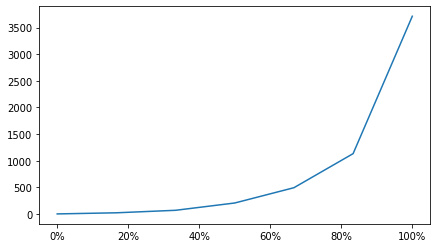

In [31]:
# percentile curve
import numpy as np
import pylab as P
import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
# https://stackoverflow.com/questions/26294360/pyplot-using-percentage-on-x-axis
spc = list(catD.values())
print(spc)
pct = np.percentile(spc, q=(0.0, 10.0, 25.0, 50.0, 75.0, 90.0, 100.0))

perc = np.linspace(0,100,len(pct))
fig = plt.figure(1, (7,4))
ax = fig.add_subplot(1,1,1)
ax.plot(perc, pct)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

plt.show()

# P.plot(spc)
# P.show()

example: 洗髮精

occurrences: 3713

In [36]:
shampoo_names = []
for p, n in zip(catdf['product'], catdf['name']):
  for x in p.split(';'):
    if x == '洗髮精':
      shampoo_names.append(n)
      break

In [38]:
print(len(shampoo_names))
shampoo_names[:20]

3713


['Alpecin雙動力咖啡',
 'A-無患子咖啡因控',
 '呂韓方頭皮養護洗髮精-營養潤澤400ml【康是美】',
 'DR CYJ 髮胜月太賦活洗髮精150ml(3入)',
 'Farcent香水奇蹟洗髮露600ml真我星夜',
 '4902111758855麗仕 髮?補給角蛋白胺基酸洗髮精450g',
 '252612@H 飛柔薄荷水涼洗髮乳1000ML',
 '566香水能量洗髮露-幸運加氛[510g]',
 '[現貨] 淨 男士去屑洗髮乳清爽控油型200g【金興發】',
 'Diane完美奇蹟雙護洗髮精 450ml',
 '566抗屑柔順洗髮乳',
 '花香5 絲柔順滑 原效洗髮乳-1100g',
 '409730@沙宣護色亮澤洗髮乳500ML',
 '4712318590314綠藤生機 Greenvines 頭皮淨化洗髮精',
 '【SAHOLEA 森歐黎漾】極水漾 杏桃柔順洗髮露480ml(Sandy吳姍儒代言)',
 'EAU耀香緹頭皮護理洗髮露-中性',
 '美吾髮仙草洗髮精',
 '563999@思波綺豐盈洗髮精軟塌髮用50',
 '落建 頭皮洗髮乳 保濕豐厚配方400ml',
 '716921@淨植覺控油去屑洗髮露白茶精']

In [42]:
with open(f'{maindir}/shampoos.txt', 'w') as f:
  for s in shampoo_names:
    f.write(s+'\n')

1. multilabel
2. 217 hit phrase lists? -> bash script 
3. noises in the spm result (human check? then why not human labeling all 217 lists)

In [ ]:
'''
(base) yangqingwen@ip71-176 src % ./spm_train --input=/Users/yangqingwen/Desktop/110-2課程/fintech/shampoos.txt --model_prefix=/Users/yangqingwen/Desktop/110-2課程/fintech/spm_shampoos --model_type='bpe' --vocab_size=2000  
'''
'''
<unk>	0
<s>	0
</s>	0
洗髮	-0
洗髮精	-1
ml	-2
00	-3
洗髮乳	-4
50	-5
洗髮露	-6
▁【	-7
500	-8
控油	-9
頭皮	-10
400	-11
750	-12
100	-13
去屑	-14
ML	-15
修護	-16
植萃	-17
1000	-18
80	-19
保濕	-20
600	-21
香水	-22
抗屑	-23
咖啡	-24
護色	-25
700	-26
健髮	-27
清爽	-28
豐盈	-29
咖啡因	-30
去屑洗髮乳	-31
250	-32
66	-33
海倫	-34
艾瑪	-35
la	-36
▁5	-37
▁A	-38
▁海倫	-39

'''